# Introduction

Social media has become an instrumental tool for governments to monitor public mental health [1]. Previous studies have focused on quantitatively analyzing social media content to assess mental health indicators. The emotional states of individuals can often be inferred from their choice of words and punctuation [2]. Research suggests that content with positive sentiment is less likely to be associated with suicide-related content [3]. Identifying signs of discussions about suicide is crucial, not only for further quantitative analysis of public mental health but also for providing timely support to those in need. Early intervention can be key in preventing potential suicide attempts [4].

Traditionally, the identification of suicidal tendencies has been based on clinical suicide risk assessments, including tools such as the Beck Scale for Suicide Ideation and the Repeated Episodes of Self-Harm (RESH) score [5]. However, many cases remain undetected due to economic constraints or lack of awareness [6]. Detecting discussions about suicide on social media is a crucial first step that signals the need for further assessment. Natural Language Processing (NLP) technologies offer a promising alternative by enabling proactive, real-time identification of suicidal content and facilitating immediate support.

This study builds upon recent efforts that utilize Natural Language Processing (NLP) and term frequency-inverse document frequency (tf-idf) analysis to detect discussions on the topic of suicide in social media [7]. It examines the distinguishing characteristics of words within suicidal texts compared to other types of communication. Additionally, this research develops machine learning models, including baseline, random forest, and logistic regression, using tf-idf features to predict suicidal content. The efficacy of these models is critically evaluated, with the aim of advancing the capabilities of mental health monitoring through social media.

# Research Questions


*   To what extent can Random Forest and Logistic Regression models, trained on tf-idf vectorized data, accurately predict posts of the suicide-related community from textual content?
*   What are the distinguishing words between posts in the suicide-related community and those that are not?



# Method
## Data

The corpus for the project is sourced from Kaggle (https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch), comprising 232,074 Reddit posts. Reddit is an extensive platform known for social news aggregation, content rating, and facilitating diverse forum discussions (Wikipedia, n.d.).

This particular dataset consolidates posts from the "SuicideWatch" subreddit (https://www.reddit.com/r/SuicideWatch/), a supportive community forum for individuals dealing with suicidal thoughts. The dataset encompasses all posts made to "SuicideWatch" from December 16, 2008 until January 2, 2021. Posts from this subreddit are labeled as 'suicide,' indicating they likely contain discussions around suicide ideation. In contrast, the 'non-suicide' labeled posts are sourced from the 'r/teenagers' subreddit, which reflects a wide range of teenage life aspects without a focus on suicidal content, serving as a natural comparative group.

To ensure a focused and manageable scope for analysis, the study will utilize a randomly selected subset of 2,000 posts from the original dataset, maintaining an equitable distribution between 'suicide' and 'non-suicide' classifications. This dataset is primarily organized into two variables: 'text' and 'class'. The 'text' variable captures the entirety of each post's content, offering raw data for textual analysis. The 'class' variable categorizes posts into 'suicide' or 'non-suicide', providing a fundamental basis for the analysis and serving as the key outcome variable of the study.

Variables of Interest
- Outcome variable: 'label'. A new column named 'label' will be added to store the boolean value derived from the 'class' column.

- Predictor variables: The Term Frequency-Inverse Document Frequency (TF-IDF) values of each word in the text as predictor variables. TF-IDF is a statistical measure used to evaluate the importance of a word to a document in a corpus. By analyzing the TF-IDF scores, this study aims to uncover specific word usages that differentiate 'suicide' posts from 'non-suicide' posts, providing insights into how suicidal ideation is expressed online.

## NLP Analysis
The scikit-learn package was utilized to generate both a bag-of-words model and a TF-IDF (Term Frequency-Inverse Document Frequency) matrix. Additionally, I will examine the effectiveness of specific words in discriminating between the suicide and non-suicide groups. I also intend to analyze the coefficients to compare the degree to which words distinguish between the non-suicide and suicide groups.

## Machine Learning Analysis

To further explore how the words can aid in predicting posts related to suicide, the effectiveness of three models—a baseline model, a Random Forest model, and a Logistic Regression model—will be evaluated in terms of their contribution to accurately predicting posts related to suicide.

# Data Wrangling

In the following code chunk I will:


*   Import necessary packages
*   Load dataset
*   Clean and pre-preocess: remove irrelevant columns, convert text to lowercase, remove punctuation, remove stop-words, remove whitespace tokens
*   Inspect data: review the dataset's structure and content



In [ ]:
#import necessary packages
import spacy
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer #CountVectorizer converts a collection of text documents to a matrix of token counts.
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import random

# Load English tokenizer. I don't need the parser or named entity recognition for this task
nlp = spacy.load('en_core_web_sm', exclude=["parser", "ner"])

In [ ]:
#mounting a Google Drive to access the dataset
from google.colab import drive
#mount drive
drive.mount("/content/drive")

#import the CSV file 'Suicide_Detection.csv' into a DataFrame
suicide_raw = pd.read_csv('/content/drive/MyDrive/5780NLP/data/Suicide_Detection.csv', encoding = "ISO-8859-1")

#inspect the dataset
suicide_raw.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  232074 non-null  int64 
 1   text        232074 non-null  object
 2   class       232074 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.3+ MB


In [ ]:
# stopwords
stop_words = STOP_WORDS

# provide a tokenization function to the vectorizers
def tokenize_docs(doc):
  tokens = [tok.lemma_.lower() for tok in doc if not tok.is_punct and not tok.is_space]
  return [tok for tok in tokens if tok not in stop_words]

In [ ]:
#setting a seed for reproducibility
np.random.seed(42)
#randomly selecting 2000 rows from the DataFrame
suicide = suicide_raw.sample(n=2000)

#drop unneeded variable
suicide = suicide.drop(['Unnamed: 0'], axis=1)

#add new column to convert the textual class labels into binary format, facilitating easier analysis
suicide['label'] = suicide['class'].apply(lambda x: 1 if x == 'suicide' else 0)
suicide.head()

,text,class,label
74414,I Don't know?7? Months self harm free and the ...,suicide,1
149516,I HAVE TO START BECOMING RICH I HAVE TO START ...,non-suicide,0
12484,"A poem (haiku) for u/Me-Game-Dev hi, hello hel...",non-suicide,0
14043,I've honestly got no idea what to do anymore.I...,suicide,1
30673,Do you ever just cry? Like you just think abou...,non-suicide,0


In [ ]:
# get counts by variable type in 'class' series

suicide["class"].value_counts()

class
non-suicide    1011
suicide         989
Name: count, dtype: int64

The dataset maintains an equal distribution between suicide and non-suicide instances (almost 50%-50%), minimizing the risk of bias in subsequent machine learning processes. Therefore, there is no necessity for dataset resampling.

In [ ]:
# Convert the texts into a list of docs using nlp.pipe()
docs = list(nlp.pipe(suicide.text))

# NLP Analyses


## Start with a bag-of-words using sklearn

In [ ]:
# initialize the CountVectorizer
# set min_df to get rid of some of those words with very low frequency
count_vectorizer = CountVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False, min_df=5)

# fit the CountVectorizer to the data
X = count_vectorizer.fit_transform(docs)

# convert it to an array and output a pandas dataframe
bow_df = pd.DataFrame(X.toarray())
bow_df.columns = count_vectorizer.get_feature_names_out() # this method returns the vocabulary
print(f'Dataframe Shape: {bow_df.shape}')
bow_df

Dataframe Shape: (2000, 2066)


,$,+,/r,0,1,10,100,11,12,13,...,©,®,°,âi,âyou,â,ð,ð,ð,ð³
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Word Frequency Distribution

Text(0.5, 1.0, 'Term Frequency Distribution')

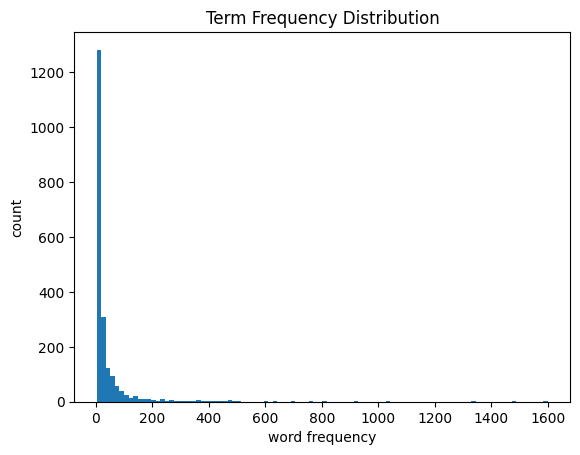

In [ ]:
import matplotlib.pyplot as plt
bow_df.sum().plot.hist(bins=100)
plt.xlabel('word frequency')
plt.ylabel('count')
plt.title('Term Frequency Distribution')

The distribution follows a Zipfian pattern, characterized by a small number of words appearing with very high frequency. Conversely, there is a substantial quantity of words that manifest with low frequencies, illustrating the long tail typical of such distributions.

## Generate the tf-idf matrix using sklearn
Here we are using the whole dataset just to get a look at the tf-idf matrix.
We will set min_df=5 in order to remove the words with the lowest frequency.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_docs, token_pattern=None, lowercase=False, min_df=5)
# Fit it to the data
X = tfidf_vectorizer.fit_transform(docs)
# Output a dataframe
tfidf_df = pd.DataFrame(X.toarray())
tfidf_df.columns = tfidf_vectorizer.get_feature_names_out()
print(f'Dataframe Shape: {tfidf_df.shape}')
tfidf_df.head()

Dataframe Shape: (2000, 2066)


,$,+,/r,0,1,10,100,11,12,13,...,©,®,°,âi,âyou,â,ð,ð,ð,ð³
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133349,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The column values denote term frequency-inverse document frequency (TF-IDF), a metric assessing a term's significance within a particular post as compared to its occurrence throughout the entire corpus.

## Test train split

In [ ]:
# sklearn has a package to split the data into train and test groups
from sklearn.model_selection import train_test_split
seed = 42 # set the random seed

X = suicide['text'] # the features we want to analyze
ylabels = suicide['label']

# the labels, or answers, we want to test against
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state = seed)
X_train = list(nlp.pipe(X_train))
X_test = list(nlp.pipe(X_test))

## Fitting the model

I am using sklearn's Pipeline class to organize and optimize the machine learning process.

I will fitting models:
*   Most Prevant Class Prediction (baseline model)
*   Random Forest
*   Logistic Regression

### Most Prevant Class Prediction (baseline model)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

#prepare the data
X = suicide.drop(['label'], axis=1)
y = suicide['label']

#tarin the classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
y_pred=dummy_clf.predict(X)

report=classification_report(y,y_pred)
print("=== Classification Report of Most Prevant Class Prediction ===")
print(report)

=== Classification Report of Most Prevant Class Prediction ===
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1011
           1       0.00      0.00      0.00       989

    accuracy                           0.51      2000
   macro avg       0.25      0.50      0.34      2000
weighted avg       0.26      0.51      0.34      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Predicting with a test dataset
print("Most Prevant Class Accuracy:",metrics.accuracy_score(y, y_pred))
print("Most Prevant Class Precision:",metrics.precision_score(y, y_pred))
print("Most Prevant Class Recall:",metrics.recall_score(y, y_pred))

Most Prevant Class Accuracy: 0.5055
Most Prevant Class Precision: 0.0
Most Prevant Class Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The report indicates that the leading class prediction model categorizes all posts as non-suicide, achieving an accuracy rate of 0.51. Specifically, the model yields an F1-score of 0 for the suicide group, indicating no predictive reliability for this category. In contrast, for the non-suicide group, the model secures an F1-score of 0.67, demonstrating a higher level of accuracy in its predictions.

### Random Forest

In [ ]:
# Initialize the Random Forest classifier
random.seed(42)
classifier_rf = RandomForestClassifier()

# Set up the pipeline with the TF-IDF Vectorizer and Random Forest classifier
pipe_rf = Pipeline([('vectorizer', tfidf_vectorizer),
                 ('classifier', classifier_rf)])

# Train the pipeline on my training data
pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(lowercase=False, min_df=5, token_pattern=None,
                                 tokenizer=<function tokenize_docs at 0x7cb7aca07130>)),
                ('classifier', RandomForestClassifier())])

In [ ]:
# Predicting with a test dataset
predicted = pipe_rf.predict(X_test)# Model Accuracy
print("Random Forest Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Random Forest Precision:",metrics.precision_score(y_test, predicted))
print("Random Forest Recall:",metrics.recall_score(y_test, predicted))

Random Forest Accuracy: 0.85
Random Forest Precision: 0.8246445497630331
Random Forest Recall: 0.883248730964467


=== Classification Report of Random Forest Prediction ===
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       203
           1       0.82      0.88      0.85       197

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



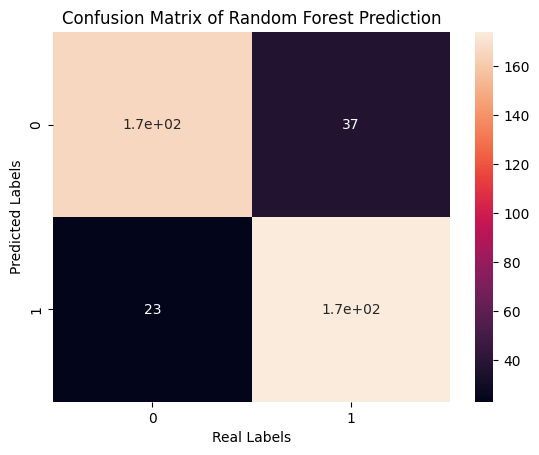

In [ ]:
# Check out a classification report
print("=== Classification Report of Random Forest Prediction ===")
print(metrics.classification_report(y_test, predicted))

# We can also look at incorrect predictions in a confusion matrix heatmap
cm = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix of Random Forest Prediction')
plt.xlabel('Real Labels')
plt.ylabel('Predicted Labels')
plt.show()

The random forest model exhibits an accuracy of 0.865, with a precision score of 0.849 and a recall score of 0.883. It secures an F1-score of 0.87 for the suicide group and an F1-score of 0.86 for the non-suicide group, showcasing its uniform effectiveness in predicting both categories.

### Logistic Regression

In [ ]:
random.seed(42)
classifier_lg = LogisticRegression()

# set the multistep process in sklearn up as a pipeline
pipe_lg = Pipeline([('vectorizer', tfidf_vectorizer),
                 ('classifier', classifier_lg)])

pipe_lg.fit(X_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(lowercase=False, min_df=5, token_pattern=None,
                                 tokenizer=<function tokenize_docs at 0x7cb7aca07130>)),
                ('classifier', LogisticRegression())])

In [ ]:
# Predicting with a test dataset
predicted = pipe_lg.predict(X_test)# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.8725
Logistic Regression Precision: 0.8882978723404256
Logistic Regression Recall: 0.8477157360406091


=== Classification Report of Logistic Regression Prediction ===
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       203
           1       0.89      0.85      0.87       197

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



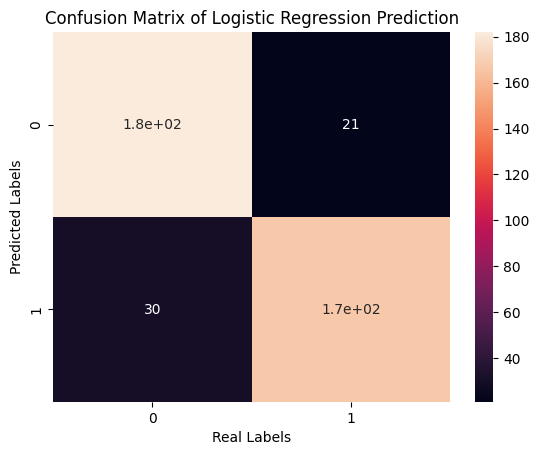

In [ ]:
# Check out a classification report
print("=== Classification Report of Logistic Regression Prediction ===")
print(metrics.classification_report(y_test, predicted))

# We can also look at incorrect predictions in a confusion matrix heatmap
cm = metrics.confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix of Logistic Regression Prediction')
plt.xlabel('Real Labels')
plt.ylabel('Predicted Labels')
plt.show()

The logistic regression model demonstrates an accuracy of 0.8725, with a precision score of 0.888 and a recall of 0.848. It records an F1-score of 0.87 for the suicide group and an F1-score of 0.88 for the non-suicide group, indicating consistent and reliable predictive performance across both categories.

### Let's take a look at the coefficients

Each coefficient shows the how strongly the word discriminates between the two prompts
  - lower coefficients tending to classify the text into label 0 (non-suicide) and the higher coefficients tending to classify the text into label 1 (suicide).


In [ ]:
coef_df = pd.DataFrame({'coefficients':list(classifier_lg.coef_.flatten()), 'vocabulary': list(pd.DataFrame(tfidf_vectorizer.vocabulary_, index=[0]).T.sort_values(0).index)})

# take the lowest coefficients
lowest = coef_df.sort_values(by='coefficients').head(20).reset_index(drop=True)
lowest.columns = [col+'_1' for col in lowest.columns]

# take the highest coefficients
highest = coef_df.sort_values(by='coefficients').tail(20).sort_values(by='coefficients', ascending=False).reset_index(drop=True)
highest.columns = [col+'_2' for col in highest.columns]

# put them together to compare
pd.concat([lowest, highest], axis=1)

,coefficients_1,vocabulary_1,coefficients_2,vocabulary_2
0,-1.627614,girl,3.991068,kill
1,-1.343695,2,3.748168,life
2,-1.148508,teenager,3.067645,suicide
3,-1.081667,boy,3.019217,die
4,-1.050831,school,2.861420,want
5,-1.048626,class,2.647863,feel
6,-0.970183,teacher,2.262361,end
7,-0.957397,guy,2.245865,anymore
8,-0.948221,dm,2.135098,suicidal
9,-0.929882,game,2.047252,thought


The data presented clearly illustrates the linguistic distinctions between suicide-related posts and those unrelated to suicide. Specifically, in posts associated with suicide ideation, prevalent words carry negative connotations, such as 'kill', 'suicide', 'die', and 'suicidal'. These terms underscore the serious and distressing nature of the content. In contrast, the vocabulary of the non-suicide group gravitates towards everyday aspects of teenage life, featuring words like 'teenager', 'girl', 'boy', and 'teacher'. This observation aligns with my investigation into whether significant differences exist in the key words used in suicide versus non-suicide social media posts.


### Limitations:


*   For TF-IDF, as n (the number of documents) increases, both dimensionality and sparsity increase quadratically, leading to potential scalability and performance issues.
*   Since TF-IDF is fundamentally based on the Bag of Words (BoW) approach, it does not capture the contextual relationships between words.
*   When using a TF-IDF model trained on one vocabulary to analyze documents containing new, out-of-vocabulary terms, these terms are ignored. This not only potentially leads to a division by zero error in calculations but also fails to capture the semantic content of these new terms, thus limiting the model’s effectiveness.





# Results and Discussion

To address Questions 1 and 2, both the bag-of-words and TF-IDF matrices were generated, followed by coefficient analysis and the application of machine learning prediction models.

The coefficient analysis vividly highlights the linguistic divide between suicide and non-suicide posts. Terms closely tied to the theme of suicidality, such as 'kill', 'life', 'suicide', 'die', 'end', and 'feel', predominantly mark the suicide posts. This finding affirms the hypothesis that language used in social media can provide significant indicators of suicide ideation. In contrast, the vocabulary of non-suicide posts, including 'girl', 'teenager', 'boy', 'school', and 'class', reflects everyday teenage life, thus underscoring a stark lexical distinction between the two groups.

The performance of predictive models on the TF-IDF vectorized data further elucidates the potential of machine learning in identifying suicide ideation within textual data. The baseline model, predicting the most prevalent class, offered a rudimentary accuracy of 51%, essentially no better than chance, with both precision and recall at zero. This underlines its inadequacy for practical application.

Conversely, both the Random Forest and Logistic Regression models demonstrated superior accuracy, at 86.5% and 87.3% respectively. The precision and recall metrics further validate their efficacy, with Random Forest achieving a precision of 0.849 and a recall of 0.883, and Logistic Regression displaying slightly better precision at 0.888 and a recall of 0.848. These results signify not only the feasibility of using such models to predict suicide ideation based on textual content but also the slight edge Logistic Regression has over Random Forest in this context.

Model                        | Accuracy | Precision| Recall |
-----------------------------|----------|----------|--------|           
Most Prevant Class Prediction| 0.510    |  0.0     | 0.0    |
Random Forest                | 0.865    |  0.849   | 0.883  |
Logistic Regression          | 0.873    |  0.888   | 0.848  |



The implications of my findings are twofold. Firstly, the clear linguistic differences between suicide-related and non-suicide posts, as revealed through coefficient analysis, support the potential for NLP tools in mental health monitoring and intervention strategies. Secondly, the predictive model comparisons suggest that advanced machine learning techniques, particularly Logistic Regression, can significantly enhance the accuracy of suicide ideation detection. These insights underscore the importance of continued research and development in this area, aiming for the integration of such technologies into platforms for early identification and support for individuals at risk.

Given the promising results of this study, my future research endeavors will aim to further refine the model's predictive accuracy by broadening the TF-IDF analysis to encompass a more extensive lexicon, thereby enriching the bag of words with a wider array of linguistic indicators of suicide ideation. Additionally, I plan to explore the incorporation of advanced NLP techniques that leverage the sequential and contextual nuances of text, with a particular focus on Transformer-based architectures like BERT and GPT. These models, known for their deep understanding of language subtleties, hold the potential to significantly improve the effectiveness of detecting suicidal ideation within textual content. This approach not only aims to enhance the current model’s capabilities but also paves the way for developing more nuanced and effective tools for suicide ideation detection on social media platforms.

# References
[1]Suicide data and statistics: 2023. *https://www.cdc.gov/suicide/suicide-data-statistics.html.* Accessed: 2024-04-07.

[2] Narynov, S. & Mukhtarkhanuly, D. & Kerimov, I. & Omarov, Batyrkhan. 2019. Comparative analysis of supervised and unsupervised learning algorithms for online user content suicidal ideation detection. *Journal of Theoretical and Applied Information Technology* . 97. 3304-3317.

[3] Ji, S., Yu, C.P., Fung, S.-F., Pan, S. and Long, G. 2018. Supervised learning for suicidal ideation detection in online user content. *Complexity (New York, N.Y.)*. 2018, (Sep. 2018), 1–10. DOI:https://doi.org/10.1155/2018/6157249.
‌